# "Изменение разрешения данных"

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt 

# Понижение разрешения (downsampling)

In [2]:
df = pd.read_csv('gold_clean.csv')
df['ts'] = pd.to_datetime(df.ts)
df.head()

,ts,open,high,low,close,vol
0,2018-01-02 02:01:00,1305.3,1305.9,1304.6,1304.7,407
1,2018-01-02 02:02:00,1304.7,1305.1,1304.7,1305.0,91
2,2018-01-02 02:03:00,1305.0,1305.4,1305.0,1305.4,42
3,2018-01-02 02:04:00,1305.4,1305.5,1305.1,1305.2,89
4,2018-01-02 02:05:00,1305.2,1305.2,1305.1,1305.1,23


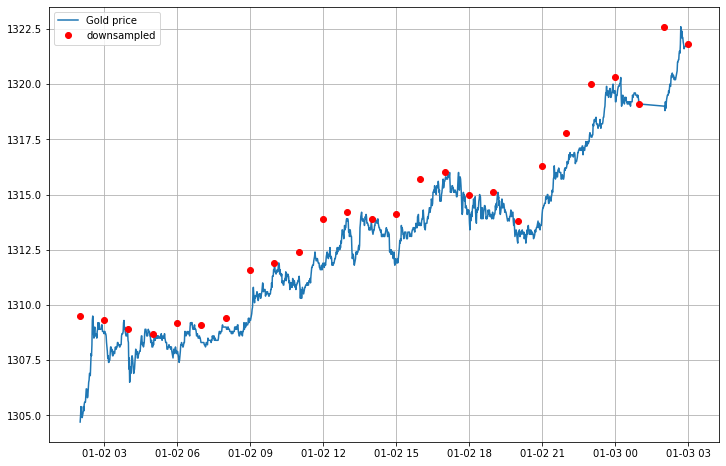

,ts,open,close,vol,high,low
0,2018-01-02 02:00:00,1305.3,1309.5,5284,1309.7,1304.6
1,2018-01-02 03:00:00,1308.8,1309.3,4906,1309.3,1307.3
2,2018-01-02 04:00:00,1308.4,1308.9,7923,1309.0,1306.2
3,2018-01-02 05:00:00,1308.0,1308.7,4039,1308.7,1307.4
4,2018-01-02 06:00:00,1307.8,1309.2,4529,1309.3,1307.3


In [3]:
df = df.iloc[:1440]

## cвоя функция аггреагции: возвращаем наименьшее значение
def myFunc(value):
    return min(value)

## определяем, как аггрегировать данные в колонках
conversion = {
    'open' :  'first', ## для цены открытия берём первое значение 
    'close':  'max',  ## для цены закрытия - cреднее
    'vol'  :  'sum',   ## суммируем объёмы сделок в этот час
    'high' :  'max',   ## берём максимум пикового значения
    'low'  :  myFunc   ## можно определить свою функцию аггрегации для наименьшого значения
}

## downsampling будем проводить по переменной времени - ts
df = df.set_index('ts')
## уменьшаем частоту данных до 1 часа, аггрегируем данные, как описано выше
downsampled = df.resample('1H').apply(conversion)
## возвращаем время ts из индекса в отдельную колонку
df = df.reset_index()
downsampled = downsampled.reset_index()

## визуализируем
f, ax = plt.subplots(figsize=(12, 8))
ax.plot(df.ts, df.close)
ax.plot(downsampled.ts, downsampled.close, c='r', marker='o', lw=0)
ax.legend(['Gold price', 'downsampled'])
ax.grid()
plt.show()

downsampled.head()

In [4]:
print(f'len(df) = {len(df)}')
print(f'len(downsampled) = {len(downsampled)}')

len(df) = 1440
len(downsampled) = 26


# Upsampling

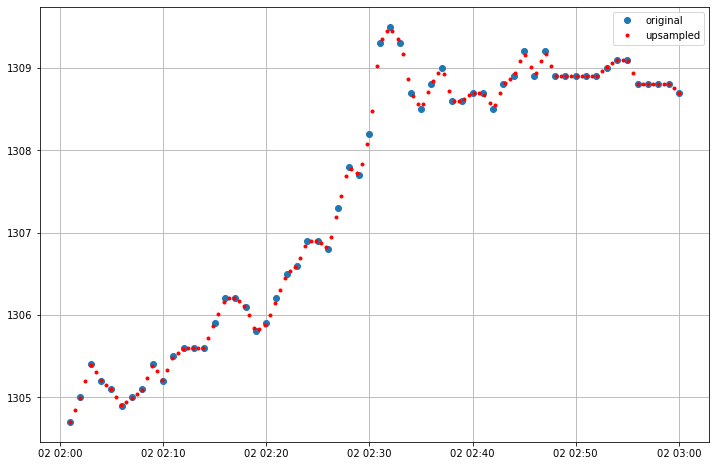

In [7]:
df = pd.read_csv('gold_clean.csv')

df['unixtime'] = df.ts
## преобразуем юниксовое время в таймстемп
df['ts'] = pd.to_datetime(df.ts)
## возьмём только первый час данных (60 минут)
df = df.iloc[:60]

## cделаем интерполяционную сетку, 120 значений (каждые 30 секунд)
## np.interp не умеет работать с таймстемпами, поэтому будем использовать
## юниксовое время, являющееся просто int
ti = np.linspace(df.unixtime.min(), df.unixtime.max(), 120)
## интерполируем
upsampled = np.interp(ti, df.unixtime, df.close)
## переведём интерполяционную сетку в таймстемп
ts = pd.to_datetime(ti)

## визуализируем
f, ax = plt.subplots(figsize=(12, 8))
## исходные данные
ax.plot(df.ts, df.close, marker='o', lw=0)
## красными кружками помечаем моменты, в которые мы теперь имеем данные
ax.plot(ts, upsampled, c='r', marker='o', lw=0, markersize=3)
ax.legend(['original', 'upsampled'])
ax.grid()
plt.show()

# Понижение разрешения (Downsampling)

,timestamp,close
0,2018-01-02 02:01:00,1304.7
1,2018-01-02 02:02:00,1305.0
2,2018-01-02 02:03:00,1305.4
3,2018-01-02 02:04:00,1305.2
4,2018-01-02 02:05:00,1305.1


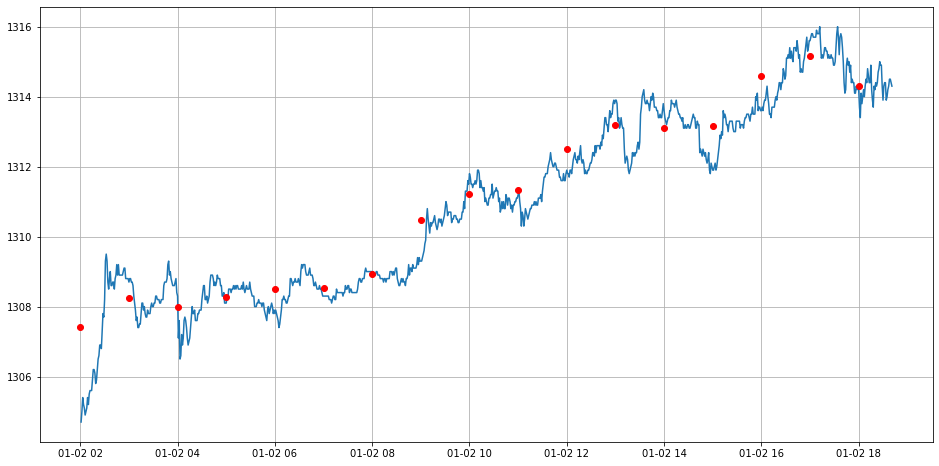

In [6]:
df = pd.read_csv('gold_clean.csv')
df = df.iloc[:1000]

df['timestamp'] = pd.to_datetime(df.ts) 

df = df[['timestamp', 'close']]
conversion = {'close' : 'mean'}

df = df.set_index('timestamp')
df_resampled = df.resample('1H').apply(conversion)
df = df.reset_index()
df_resampled = df_resampled.reset_index()

f, ax = plt.subplots(figsize=(16, 8))
ax.plot(df.timestamp, df.close)
ax.plot(df_resampled.timestamp, df_resampled.close, c='r', lw=0, marker='o')
ax.grid()

df.head()